In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
df = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/heart_disease.csv')

In [3]:
df1 = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/heart_disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df1.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


<Axes: >

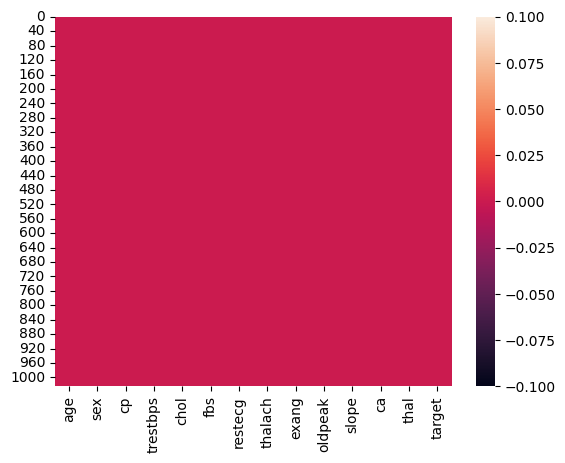

In [6]:
# Checking for null values in both datasets  using seaborn
sns.heatmap(df.isnull()) #clean dataset 

<Axes: >

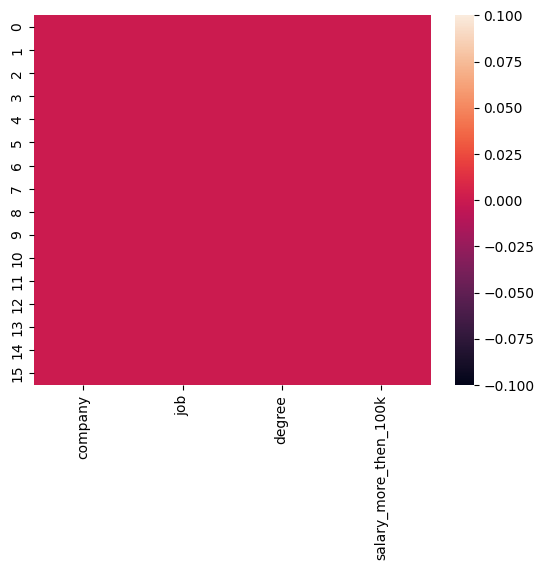

In [7]:
sns.heatmap(df1.isnull()) #clean dataset

#### Working with df1 dataset first

In [8]:
df1.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


#### working with categorical data first in df1

In [9]:
df1['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [10]:
df1['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [11]:
df1['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [12]:
# Turning the objects into digits first
# from sklearn.preprocessing import LabelEncoder
# le_company = LabelEncoder()
# le_degree = LabelEncoder()
# le_job = LabelEncoder()
# Creating new numerical columns out of the encoded stringed columns 
# df1['new_company'] = le_company.fit_transform(df1['company'])
# df1['new_degree'] = le_degree.fit_transform(df1['degree'])
# df1['new_job'] = le_job.fit_transform(df1['job'])
# df1.head()

In [13]:
# dropping the original columns
# df1 = df1.drop(['company','job','degree'],axis=1)

In [14]:
df1.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [15]:
#Creating dummies out of the categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df1[['company','job','degree']]).toarray()
feature_array

array([[0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.]])

In [16]:
feature_labels = ohe.categories_

In [17]:
feature_labels

[array(['abc pharma', 'facebook', 'google'], dtype=object),
 array(['business manager', 'computer programmer', 'sales executive'],
       dtype=object),
 array(['bachelors', 'masters'], dtype=object)]

In [18]:
# Creating a 1D array of the labels 
feature_labels = np.concatenate(feature_labels)

In [19]:
feature_labels

array(['abc pharma', 'facebook', 'google', 'business manager',
       'computer programmer', 'sales executive', 'bachelors', 'masters'],
      dtype=object)

In [20]:
# Creating a dataframe for the array and the labels
encoded_data = pd.DataFrame(feature_array,columns=feature_labels)
encoded_data

,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
# Concatenating the encoded data to the original data frame
df1 = pd.concat([df1,encoded_data],axis=1)

In [22]:
df1.head()

,company,job,degree,salary_more_then_100k,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,google,sales executive,bachelors,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,google,sales executive,masters,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,google,business manager,bachelors,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,google,business manager,masters,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,google,computer programmer,bachelors,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [23]:
# dropping the original columns 
df1 = df1.drop(['company','job','degree'],axis=1)

In [24]:
df1.head()

,salary_more_then_100k,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### Creating the model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [26]:
df1.columns

Index(['salary_more_then_100k', 'abc pharma', 'facebook', 'google',
       'business manager', 'computer programmer', 'sales executive',
       'bachelors', 'masters'],
      dtype='object')

In [27]:
X = df1.drop(['salary_more_then_100k'],axis=1)

In [28]:
y = df1['salary_more_then_100k']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accurracy = accuracy_score(y_test,predictions)

In [34]:
accurracy

0.8

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89         5

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



/home/omo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(confusion_matrix(y_test,predictions))

[[0 0]
 [1 4]]


In [37]:
df1['salary_more_then_100k'].value_counts()

salary_more_then_100k
1    10
0     6
Name: count, dtype: int64

In [38]:
# Model Saving

In [39]:
import joblib 

joblib.dump(model,'DT_model')
DT = joblib.load('DT_model')

#### Improving it using Random Forest

In [41]:
df1.head()

,salary_more_then_100k,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [42]:
X

,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
#model_rfc = RandomForestClassifier(n_estimators=15) ---> accuracy = 0.8
#model_rfc = RandomForestClassifier(n_estimators=60) ---> accuracy = 0.6
model_rfc = RandomForestClassifier(n_estimators=5)

In [104]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [105]:
predictions=model_rfc.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [112]:
accurracy = accuracy_score(y_test,predictions)
accurracy 

0.8

In [114]:
   cm = print(confusion_matrix(y_test,predictions))
   cm

[[0 0]
 [1 4]]


In [109]:
#Saving the model
import joblib 
joblib.dump(model_rfc,'rfc_model')
rfc = joblib.load('rfc_model')